In [15]:
import os
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import hashlib
import sklearn as sk
import os
import time
import datetime

In [42]:
path = '/home/catherinej/Downloads'
file = os.path.join(path, 'IrmaMudThicknessComparisons (1).xlsx')
mud = pd.read_excel(file)
mud.head()
mud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 12 columns):
Region                      130 non-null object
Site                        130 non-null object
Station                     130 non-null object
Date 1                      119 non-null datetime64[ns]
Date 2                      117 non-null datetime64[ns]
Date 3                      120 non-null datetime64[ns]
Thickness on Date 1 (cm)    118 non-null object
Thickness on Date 2 (cm)    115 non-null float64
Thickness on Date 3 (cm)    120 non-null object
Lat                         115 non-null float64
Lon                         115 non-null float64
Notes                       14 non-null object
dtypes: datetime64[ns](3), float64(3), object(6)
memory usage: 12.3+ KB


In [77]:
df = pd.read_excel(os.path.join(path, 'IrmaMudThicknessComparisons (1).xlsx'))
df = df.set_index(['Station'])
df.head()

df = df.replace('<0.1', 0)
df = df.replace('<1', 0.5)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, CC1 S1 to S12
Data columns (total 11 columns):
Region                      130 non-null object
Site                        130 non-null object
Date 1                      119 non-null datetime64[ns]
Date 2                      117 non-null datetime64[ns]
Date 3                      120 non-null datetime64[ns]
Thickness on Date 1 (cm)    118 non-null float64
Thickness on Date 2 (cm)    115 non-null float64
Thickness on Date 3 (cm)    120 non-null float64
Lat                         115 non-null float64
Lon                         115 non-null float64
Notes                       14 non-null object
dtypes: datetime64[ns](3), float64(5), object(3)
memory usage: 12.2+ KB


df['A'] = pd.to_datetime(df['A'])
df['B'] = pd.to_datetime(df['B'])

In [11]: df.dtypes  # if already datetime64 you don't need to use to_datetime
Out[11]:
A    datetime64[ns]
B    datetime64[ns]
dtype: object

In [12]: df['A'] - df['B']
Out[12]:
one   -58 days
two   -26 days
dtype: timedelta64[ns]

In [13]: df['C'] = df['A'] - df['B']

In [14]: df
Out[14]:
             A          B        C
one 2014-01-01 2014-02-28 -58 days
two 2014-02-03 2014-03-01 -26 days

In [78]:
df['Date 1'] = pd.to_datetime(df['Date 1'])
df['Date 2'] = pd.to_datetime(df['Date 2'])
df['Date 3'] = pd.to_datetime(df['Date 3'])

# df = df[df['ThicknessD1cm'] != 0]
# mud = mud[mud['Thickness on Date 1 (cm)'] > mud['Thickness on Date 2 (cm)'] > mud['Thickness on Date 3 (cm)']]
df = df[((df['Thickness on Date 1 (cm)'] > df['Thickness on Date 2 (cm)']) & (df['Thickness on Date 2 (cm)'] >  df['Thickness on Date 3 (cm)']))]
hurricane_date = pd.to_datetime('9/10/2017', format='%m/%d/%Y')

# df_test['Difference'] = df_test['First_Date'].sub(df_test['Second Date'], axis=0)
# df_test.head()         
# Out[22]: 
#   First_Date Second Date  Difference
# 0 2016-02-09  2015-11-19     82 days
# 1 2016-01-06  2015-11-30     37 days
# 2        NaT  2015-12-04         NaT
# 3 2016-01-06  2015-12-08     29 days
# 4        NaT  2015-12-09         NaT
# df_test['Difference'] = df_test['Difference'] / np.timedelta64(1, 'D')
# print (df_test)

diff1 = []
diff2 = []
diff3 = []
for value in df['Date 1']:
    diff = value - hurricane_date
    print(diff)
    diff1.append(diff)
df['DiffTime1'] = diff_column
df['DiffTime1'] = df['DiffTime1'] / np.timedelta64(1, 'D')

for value in df['Date 2']:
    diff = value - hurricane_date
    print(diff)
    diff2.append(diff)
df['DiffTime2'] = diff2
df['DiffTime2'] = df['DiffTime2'] / np.timedelta64(1, 'D')

for value in df['Date 3']:
    diff = value - hurricane_date
    print(diff)
    diff3.append(diff)
df['DiffTime3'] = diff3
df['DiffTime3'] = df['DiffTime3'] / np.timedelta64(1, 'D')

df.head()

100 days 00:00:00
100 days 00:00:00
99 days 00:00:00
99 days 00:00:00
99 days 00:00:00
99 days 00:00:00
99 days 00:00:00
99 days 00:00:00
69 days 00:00:00
70 days 00:00:00
140 days 00:00:00
140 days 00:00:00
139 days 00:00:00
139 days 00:00:00
139 days 00:00:00
139 days 00:00:00
139 days 00:00:00
139 days 00:00:00
185 days 00:00:00
185 days 00:00:00
283 days 00:00:00
283 days 00:00:00
282 days 00:00:00
282 days 00:00:00
282 days 00:00:00
282 days 00:00:00
282 days 00:00:00
282 days 00:00:00
278 days 00:00:00
278 days 00:00:00


,Region,Site,Date 1,Date 2,Date 3,Thickness on Date 1 (cm),Thickness on Date 2 (cm),Thickness on Date 3 (cm),Lat,Lon,Notes,DiffTime1,DiffTime2,DiffTime3
Station,,,,,,,,,,,,,,
BW2 S2,TTI,BW2,2017-12-19,2018-01-28,2018-06-20,11.0,6.5,2.0,25.92488,-81.60933,NaN,100.0,140.0,283.0
BW2 S10,TTI,BW2,2017-12-19,2018-01-28,2018-06-20,6.0,5.5,4.5,25.92484,-81.60934,NaN,100.0,140.0,283.0
UFU MUD 4,TTI,UFU,2017-12-18,2018-01-27,2018-06-19,3.0,1.0,0.0,25.90208,-81.51088,NaN,99.0,139.0,282.0
UFU MUD 5,TTI,UFU,2017-12-18,2018-01-27,2018-06-19,4.0,1.5,0.0,25.90203,-81.51088,NaN,99.0,139.0,282.0
FB 2,TTI,FBTBM,2017-12-18,2018-01-27,2018-06-19,3.0,1.0,0.0,NaN,NaN,NaN,99.0,139.0,282.0


In [12]:
only_correct_data = mud.where((mud['Thickness on Date 1 (cm)'] > mud['Thickness on Date 2 (cm)']) & 
                              (mud['Thickness on Date 2 (cm)'] > mud['Thickness on Date 3 (cm)']))
only_correct_data

,Region,Site,Station,Date 1,Date 2,Date 3,Date from Landfall,Thickness on Date 1 (cm),Thickness on Date 2 (cm),Thickness on Date 3 (cm),Lat,Lon,Notes,logical,Hurrican Landfall,day1,day2,day3
0,TTI,BW2,BW2 S2,2017-12-19 00:00:00,2018-01-28 00:00:00,2018-06-20 00:00:00,1900-04-09,11.0,6.5,2.0,25.92488,-81.60933,NaN,1.0,2017-09-10,100.0,140.0,283.0
1,TTI,BW2,BW2 S10,2017-12-19 00:00:00,2018-01-28 00:00:00,2018-06-20 00:00:00,NaT,6.0,5.5,4.5,25.92484,-81.60934,NaN,1.0,2017-09-10,100.0,140.0,283.0
2,TTI,FBTBM,FB 10,2017-12-18 00:00:00,2018-01-27 00:00:00,2018-06-19 00:00:00,NaT,3.0,2.0,0.0,NaN,NaN,NaN,1.0,2017-09-10,100.0,140.0,283.0
3,TTI,UFU,UFU MUD 5,2017-12-18 00:00:00,2018-01-27 00:00:00,2018-06-19 00:00:00,NaT,4.0,1.5,0.0,25.90203,-81.51088,NaN,1.0,2017-09-10,99.0,139.0,282.0
4,TTI,UFU,UFU MUD 4,2017-12-18 00:00:00,2018-01-27 00:00:00,2018-06-19 00:00:00,NaT,3.0,1.0,0.0,25.90208,-81.51088,NaN,1.0,2017-09-10,99.0,139.0,282.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
7,TTI,FBTBM,FB 2,2017-12-18 00:00:00,2018-01-27 00:00:00,2018-06-19 00:00:00,NaT,3.0,1.0,0.0,NaN,NaN,NaN,1.0,2017-09-10,100.0,139.0,283.0
8,TTI,FBTBM,FB 3,2017-12-18 00:00:00,2018-01-27 00:00:00,2018-06-19 00:00:00,NaT,3.0,1.0,0.0,NaN,NaN,NaN,1.0,2017-09-10,99.0,139.0,282.0
9,TTI,FBTBM,FB 9,2017-12-18 00:00:00,2018-01-27 00:00:00,2018-06-19 00:00:00,NaT,2.0,0.5,0.0,NaN,NaN,NaN,1.0,2017-09-10,99.0,139.0,282.0


In [122]:
df

,Region,Site,Date 1,Date 2,Date 3,Thickness on Date 1 (cm),Thickness on Date 2 (cm),Thickness on Date 3 (cm),Lat,Lon,Notes,DiffTime1,DiffTime2,DiffTime3
Station,,,,,,,,,,,,,,
BW2 S2,TTI,BW2,2017-12-19,2018-01-28,2018-06-20,11.0,6.5,2.0,25.92488,-81.60933,NaN,100.0,140.0,283.0
BW2 S10,TTI,BW2,2017-12-19,2018-01-28,2018-06-20,6.0,5.5,4.5,25.92484,-81.60934,NaN,100.0,140.0,283.0
UFU MUD 4,TTI,UFU,2017-12-18,2018-01-27,2018-06-19,3.0,1.0,0.0,25.90208,-81.51088,NaN,99.0,139.0,282.0
UFU MUD 5,TTI,UFU,2017-12-18,2018-01-27,2018-06-19,4.0,1.5,0.0,25.90203,-81.51088,NaN,99.0,139.0,282.0
FB 2,TTI,FBTBM,2017-12-18,2018-01-27,2018-06-19,3.0,1.0,0.0,NaN,NaN,NaN,99.0,139.0,282.0
FB 3,TTI,FBTBM,2017-12-18,2018-01-27,2018-06-19,3.0,1.0,0.0,NaN,NaN,NaN,99.0,139.0,282.0
FB 9,TTI,FBTBM,2017-12-18,2018-01-27,2018-06-19,2.0,0.5,0.0,NaN,NaN,NaN,99.0,139.0,282.0
FB 10,TTI,FBTBM,2017-12-18,2018-01-27,2018-06-19,3.0,2.0,0.0,NaN,NaN,NaN,99.0,139.0,282.0
S5,LFK,LAD,2017-11-18,2018-03-14,2018-06-15,5.0,1.5,0.0,24.66183,-81.61077,NaN,69.0,185.0,278.0


In [120]:
# #Create new dataframe with just Region, Site, Station (df_binary_site)
# mud_binary = mud[['Region', 'Site', 'Station']]
# pd.DataFrame(mud_binary)

# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# region_cat = mud_binary["Region"]
# region_cat_encoded = encoder.fit_transform(region_cat)
# region_cat_encoded
# print(encoder.classes_)
# region_cat_encoded

# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# region_cat_1hot = encoder.fit_transform(region_cat_encoded.reshape(-1,1))
# region_cat_1hot

# region_binarized = pd.DataFrame(region_cat_1hot.toarray())
# region_binarized = region_binarized.rename(columns= {0:'LFK', 1:'TTI'})
# region_binarized

# from sklearn.preprocessing import LabelBinarizer
# encoder = LabelBinarizer()
# site_cat = mud_binary["Site"]
# site_cat_1hot = encoder.fit_transform(site_cat)
# print(encoder.classes_)
# site_cat_1hot

# site_binarized = pd.DataFrame(site_cat_1hot)
# site_binarized = site_binarized.rename(columns= {0:'BW2', 1:'BW3', 2:'CBD', 3:'LAD', 4:'LNK',
#                                                  5:'UFU', 6:'WTZ'})
# site_binarized




['LFK' 'TTI']
['BW2' 'FBTBM' 'LAD' 'UFU' 'WTZ']


,BW2,BW3,CBD,LAD,LNK
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,1,0,0,0
6,0,1,0,0,0
7,0,1,0,0,0
8,0,0,1,0,0
9,0,0,0,0,1


In [50]:

# mud = mud.drop('Region', axis=1)
# mud = mud.drop('Site', axis=1)
# mud = mud.drop('Station', axis=1)
# mud.info()
# mud_concat= pd.concat([mud.reset_index(drop=True),
#                             region_binarized.reset_index(drop=True),
#                             site_binarized.reset_index(drop=True)], axis=1)

# mud = mud_concat
# mud.info()

In [80]:
# df = df.drop(['Notes'], axis=1)
# df = df.drop(['Lat'], axis=1)
# df = df.drop(['Lon'], axis=1)
# df

In [89]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(df, 0.2)

# mud_labels = train_set['Thickness on Date 3 (cm)'].copy()
# print(train_set.shape, mud_labels.shape)
# train_set.info()
# # #mud_test_num = mud_test_num.drop('Notes', axis=1)
# # ud_test_num = mud_test_num.dropna(subset=['Thickness at Date 3 (cm)'])
# # mud_test_num = mud_test_num.drop('Notes', axis=1)
# train_set = train_set.fillna(100)
# # train_set = train_set.dropna(subset=['day2'])
# # train_set = train_set.dropna(subset=['day3'])
train_set.index

Index(['FB 10', 'FB 2', 'S5', 'FB 9', 'FB 3', 'UFU MUD 5', 'UFU MUD 4',
       'BW2 S2'],
      dtype='object', name='Station')

FB 10


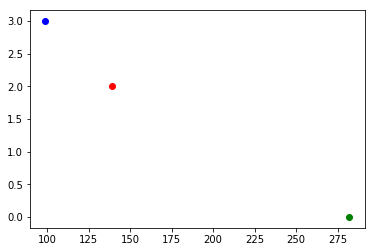

FB 2


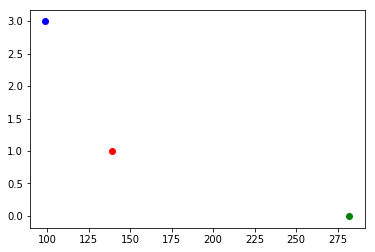

S5


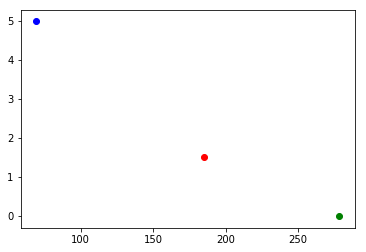

FB 9


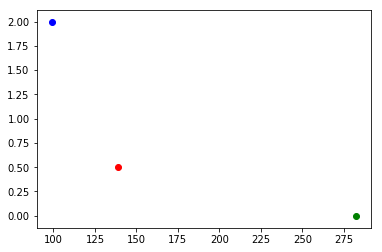

FB 3


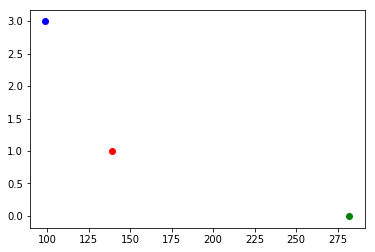

UFU MUD 5


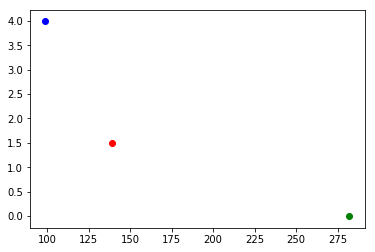

UFU MUD 4


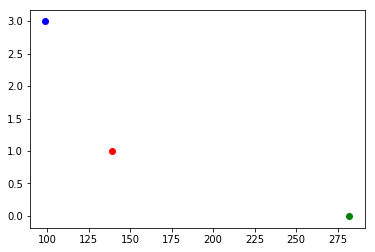

BW2 S2


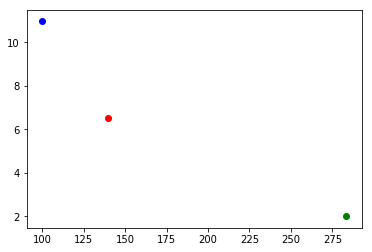

In [94]:
for station in train_set.index:
    print(station)
    x = df.loc[station]['DiffTime1']
    x2 = df.loc[station]['DiffTime2']
    x3 = df.loc[station]['DiffTime3']
    y = df.loc[station]['Thickness on Date 1 (cm)']
    y2 = df.loc[station]['Thickness on Date 2 (cm)']
    y3 = df.loc[station]['Thickness on Date 3 (cm)']
    plt.scatter(x, y, color='b')
    plt.scatter(x2, y2, color='r')
    plt.scatter(x3, y3, color='g')
    plt.show()

In [99]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
columns = df.columns.tolist()

columns = [c for c in columns if c in ['FB 10', 'FB 2', 'S5', 'FB 9', 'FB 3', 'UFU MUD 5', 'UFU MUD 4',
       'BW2 S2']]

In [125]:
col = df.columns.tolist()

time = [c for c in col if c in ['Thickness on Date 1 (cm)', 'Thickness on Date 2 (cm)', 'Thickness on Date 3 (cm)']]
days = [l for l in col if l in ['DiffTime1', 'DiffTime2', 'DiffTime3']]#, 'BW3', 'CDB', 'LAD', 'LNK']]
x = train_set.loc['BW2 S2'][days]
y = train_set.loc['BW2 S2'][time]
print(x, y)

DiffTime1    100
DiffTime2    140
DiffTime3    283
Name: BW2 S2, dtype: object Thickness on Date 1 (cm)     11
Thickness on Date 2 (cm)    6.5
Thickness on Date 3 (cm)      2
Name: BW2 S2, dtype: object


In [126]:
lin_reg.fit(x, y)
print('coefficient: \n', lin_reg.coef_)
print('intercept: \n', lin_reg.intercept_)
lin_reg.predict(x)
lin_reg.score(x, y)

/home/catherinej/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 3]

[0 1 2] [[-1381.4950849  -1381.4950849  -1381.4950849 ]
 [ -919.51325588  -920.27546917  -921.20360441]
 [ -340.59338695  -342.4194221   -344.71134942]]
FB 10


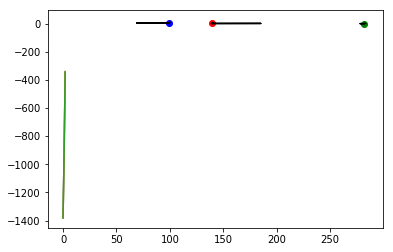

FB 2


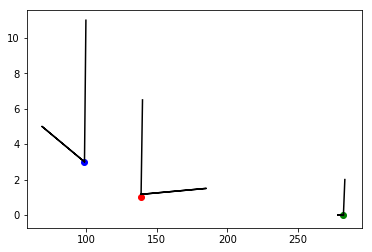

S5


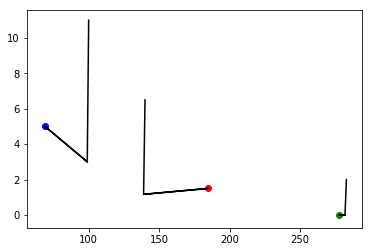

FB 9


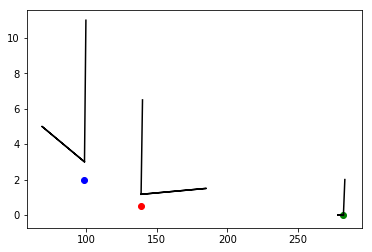

FB 3


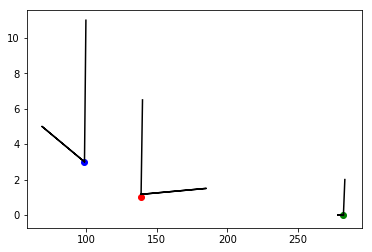

UFU MUD 5


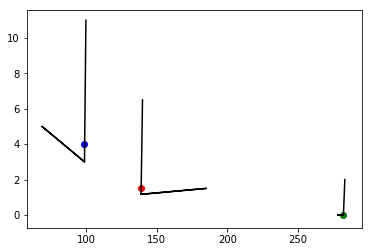

UFU MUD 4


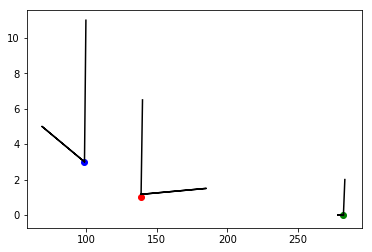

BW2 S2


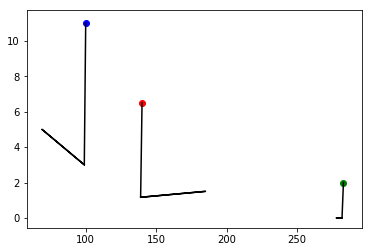

In [121]:
def graph(formula, x_range):
    x_value = np.array(x_range)
    y_value = np.array(eval(formula).T)
    
    print (x_value, y_value)
    plt.plot(x_value, y_value)
    for station in train_set.index:
        print(station)
        plt.plot(x, lin_reg.predict(x), color='k')
        x1 = df.loc[station]['DiffTime1']
        x2 = df.loc[station]['DiffTime2']
        x3 = df.loc[station]['DiffTime3']
        y1 = df.loc[station]['Thickness on Date 1 (cm)']
        y2 = df.loc[station]['Thickness on Date 2 (cm)']
        y3 = df.loc[station]['Thickness on Date 3 (cm)']
        plt.scatter(x1, y1, color='b')
        plt.scatter(x2, y2, color='r')
        plt.scatter(x3, y3, color='g')
        plt.show()
graph('lin_reg.coef_*x_value + lin_reg.intercept_', range(3))

In [116]:
lin_reg.fit?

Help on method fit in module sklearn.linear_model.base:

fit(X, y, sample_weight=None) method of sklearn.linear_model.base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : numpy array or sparse matrix of shape [n_samples,n_features]
        Training data
    
    y : numpy array of shape [n_samples, n_targets]
        Target values
    
    sample_weight : numpy array of shape [n_samples]
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.

